In [8]:
import pandas as pd

# Load the CSV file to inspect its contents
file_path = 'BTC_USD.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Ngày        2557 non-null   object
 1   Đóng cửa    2557 non-null   object
 2   Mở cửa      2557 non-null   object
 3   Cao nhất    2557 non-null   object
 4   Thấp nhất   2557 non-null   object
 5   KL          2557 non-null   object
 6   % Thay đổi  2557 non-null   object
dtypes: object(7)
memory usage: 140.0+ KB


(         Ngày    Đóng cửa      Mở cửa    Cao nhất  Thấp nhất     KL % Thay đổi
 0  10/12/2024   95,270.00   97,500.00   98,357.00  94,513.00  1.32K     -2.29%
 1   9/12/2024   97,500.00  101,240.00  101,280.00  94,255.00  1.58K     -3.69%
 2   8/12/2024  101,240.00   99,936.00  101,480.00  98,803.00  0.42K      1.30%
 3   7/12/2024   99,936.00   99,786.00  100,530.00  99,016.00  0.36K      0.15%
 4   6/12/2024   99,786.00   96,833.00  101,900.00  96,283.00  1.46K      3.05%,
 None)

In [9]:
# Data preprocessing
data['Ngày'] = pd.to_datetime(data['Ngày'], format='%d/%m/%Y')  # Convert 'Ngày' to datetime
data = data.sort_values(by='Ngày')  # Sort by date

# Clean and convert 'Đóng cửa' to numeric by removing commas and converting to float
data['Đóng cửa'] = data['Đóng cửa'].str.replace(',', '').astype(float)

# Set 'Ngày' as the index
data.set_index('Ngày', inplace=True)

# Select the closing price column for ARIMA modeling
closing_price = data['Đóng cửa']

# Display the cleaned data
closing_price.head()


Ngày
2017-12-11    16754.0
2017-12-12    16967.0
2017-12-13    16181.0
2017-12-14    16383.0
2017-12-15    17522.0
Name: Đóng cửa, dtype: float64

In [10]:
!pip install pmdarima

DEPRECATION: Loading egg at c:\users\admin\appdata\local\programs\python\python312\lib\site-packages\vnquant-0.1.2-py3.12.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=43124.131, Time=0.92 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=43122.922, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=43120.511, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=43120.759, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=43122.864, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=43120.391, Time=0.18 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=43122.388, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=43122.387, Time=0.27 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=43120.918, Time=0.63 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=43124.385, Time=0.34 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=43120.379, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=43120.641, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=43122.368, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=43122.357, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


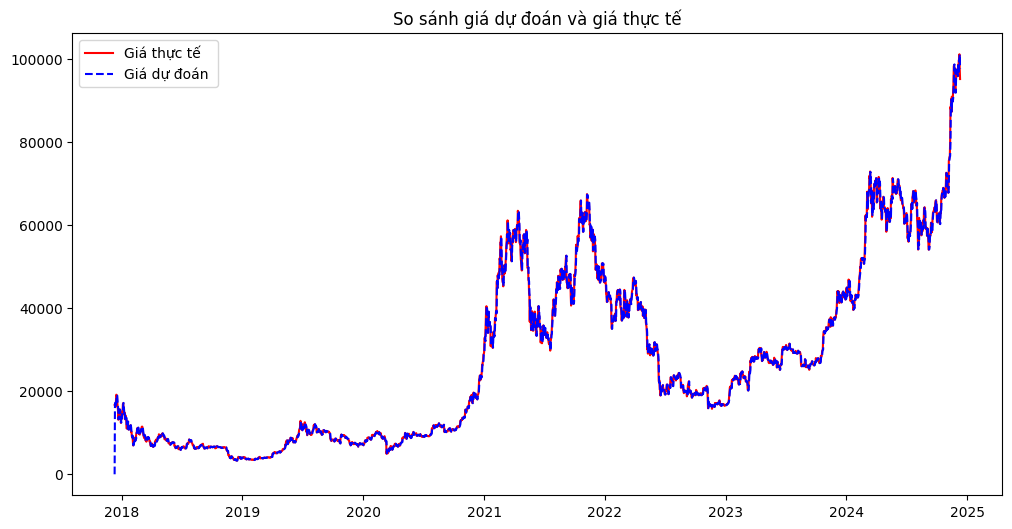

                               SARIMAX Results                                
Dep. Variable:               Đóng cửa   No. Observations:                 2557
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -21557.190
Date:                Wed, 25 Dec 2024   AIC                          43120.379
Time:                        15:51:07   BIC                          43137.918
Sample:                    12-11-2017   HQIC                         43126.739
                         - 12-10-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0388      0.013     -3.078      0.002      -0.063      -0.014
ar.L2          0.0294      0.013      2.222      0.026       0.003       0.055
sigma2       1.24e+06   1.55e+04     79.789      0.0

In [11]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import matplotlib.pyplot as plt

# Automatically determine the best ARIMA parameters using auto_arima
auto_arima_model = auto_arima(closing_price, seasonal=False, trace=True, stepwise=True)

# Extract the best order for ARIMA
best_order = auto_arima_model.order

# Train ARIMA model with the best parameters
arima_model = ARIMA(closing_price, order=best_order)
arima_result = arima_model.fit()

# Plot the actual vs fitted values
plt.figure(figsize=(12, 6))
plt.plot(closing_price, label='Giá thực tế', color='red')
plt.plot(arima_result.fittedvalues, label='Giá dự đoán ', color='blue', linestyle='--')
plt.legend(loc='upper left')
plt.title('So sánh giá dự đoán và giá thực tế')
plt.show()

# Summary of the ARIMA model
print(arima_result.summary())


In [15]:
from statsmodels.tsa.arima.model import ARIMA

# Định nghĩa mô hình ARIMA với tham số (2,1,0)
model = ARIMA(closing_price, order=(2, 1, 0))

# Huấn luyện mô hình
fitted_model = model.fit()

# Xem tóm tắt thông tin của mô hình
print(fitted_model.summary())


                               SARIMAX Results                                
Dep. Variable:               Đóng cửa   No. Observations:                 2557
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -21557.190
Date:                Wed, 25 Dec 2024   AIC                          43120.379
Time:                        16:34:36   BIC                          43137.918
Sample:                    12-11-2017   HQIC                         43126.739
                         - 12-10-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0388      0.013     -3.078      0.002      -0.063      -0.014
ar.L2          0.0294      0.013      2.222      0.026       0.003       0.055
sigma2       1.24e+06   1.55e+04     79.789      0.0

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


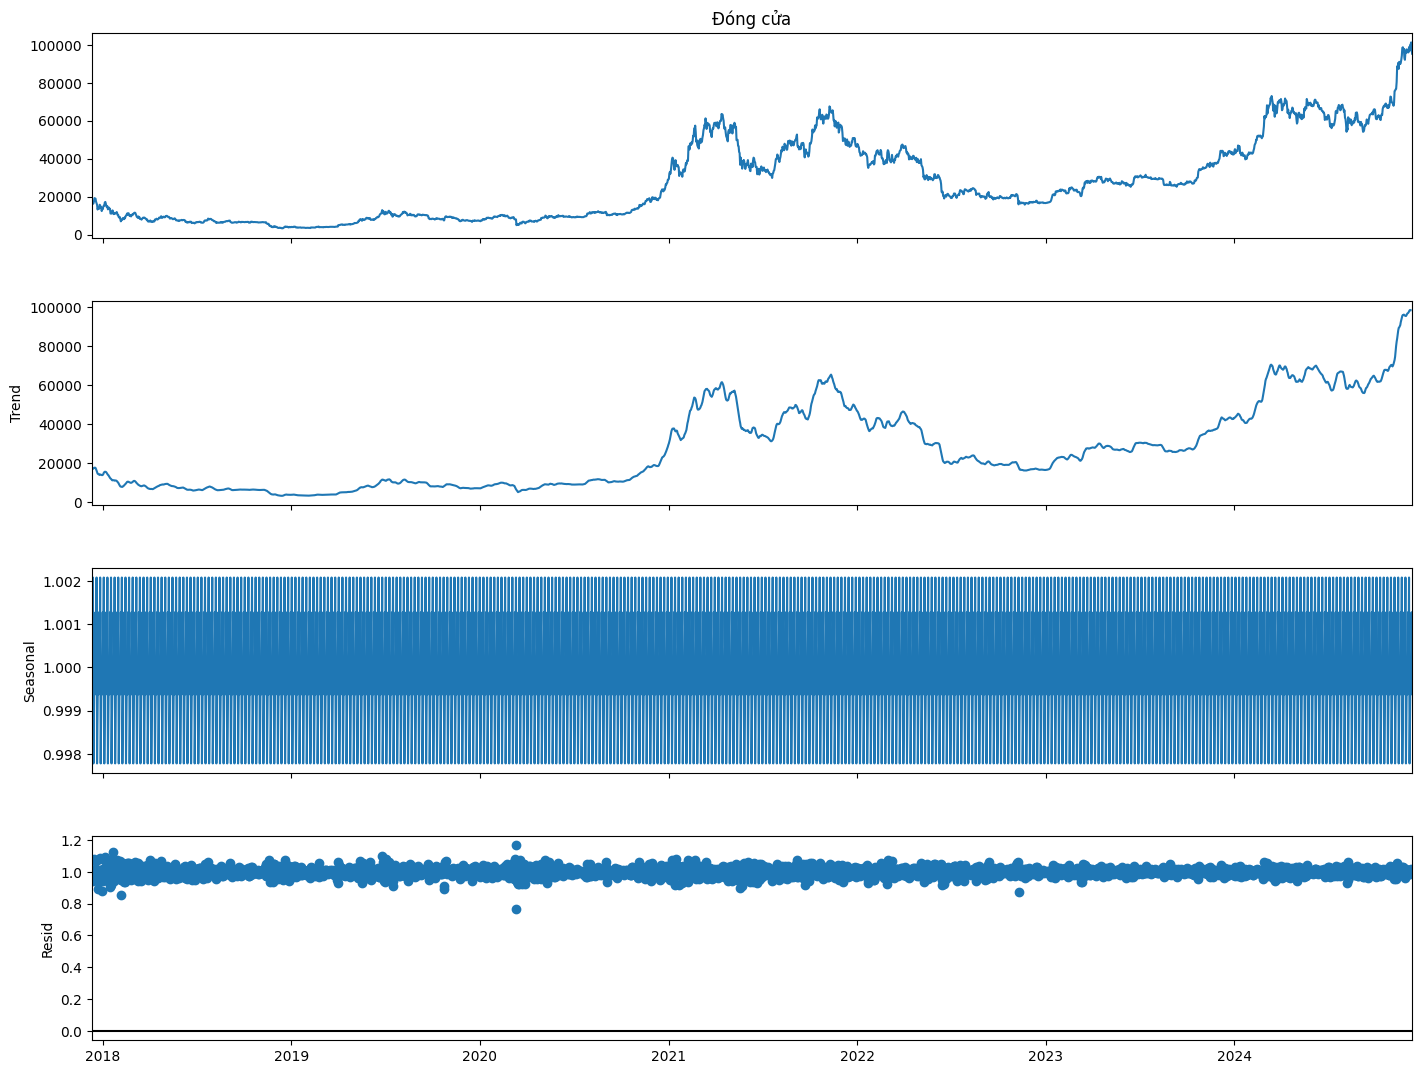

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(closing_price, model='multiplicative')
fig = result.plot()
fig.set_size_inches(16, 12)

ADF Statistic: 0.053089118961947554
p-value: 0.9627084238292818
The data is NOT stationary. Differencing is required.


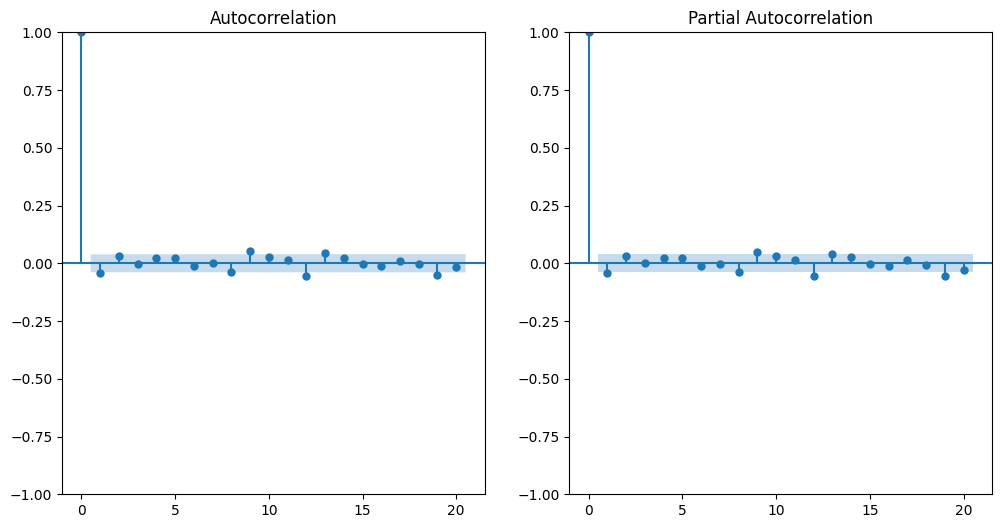

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

# === 1. Load and preprocess the data ===
# Load the dataset
file_path = 'BTC_USD.csv'
btc_data = pd.read_csv(file_path)

# Convert the 'Ngày' column to datetime format and sort by date
btc_data['Ngày'] = pd.to_datetime(btc_data['Ngày'], format='%d/%m/%Y')
btc_data = btc_data.sort_values('Ngày')

# Remove commas and convert 'Đóng cửa' to numeric
btc_data['Đóng cửa'] = btc_data['Đóng cửa'].replace({',': ''}, regex=True).astype(float)

# Extract closing prices
btc_closing_price = btc_data[['Ngày', 'Đóng cửa']]
btc_closing_price.set_index('Ngày', inplace=True)

# === 2. Check for stationarity ===
def check_stationarity(data):
    result = adfuller(data)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] <= 0.05:
        print("The data is stationary.")
    else:
        print("The data is NOT stationary. Differencing is required.")

check_stationarity(btc_closing_price['Đóng cửa'])

# Differencing if needed
btc_closing_price_diff = btc_closing_price['Đóng cửa'].diff().dropna()

# === 3. Determine ARIMA parameters ===
# Plot ACF and PACF to determine 'p' and 'q'
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(btc_closing_price_diff, lags=20, ax=plt.gca())
plt.subplot(122)
plot_pacf(btc_closing_price_diff, lags=20, ax=plt.gca())
plt.show()

# === 4. Train the ARIMA model ===
# Split data into training and testing sets
train_size = int(len(btc_closing_price) * 0.8)
train = btc_closing_price['Đóng cửa'][:train_size]
test = btc_closing_price['Đóng cửa'][train_size:]

# Fit ARIMA model with optimal (p, d, q)
model = ARIMA(train, order=(5, 1, 0))  # Example order, adjust based on ACF/PACF
model_fit = model.fit()

# === 5. Forecast and evaluate ===
forecast = model_fit.forecast(steps=len(test))
rmse = np.sqrt(mean_squared_error(test, forecast))



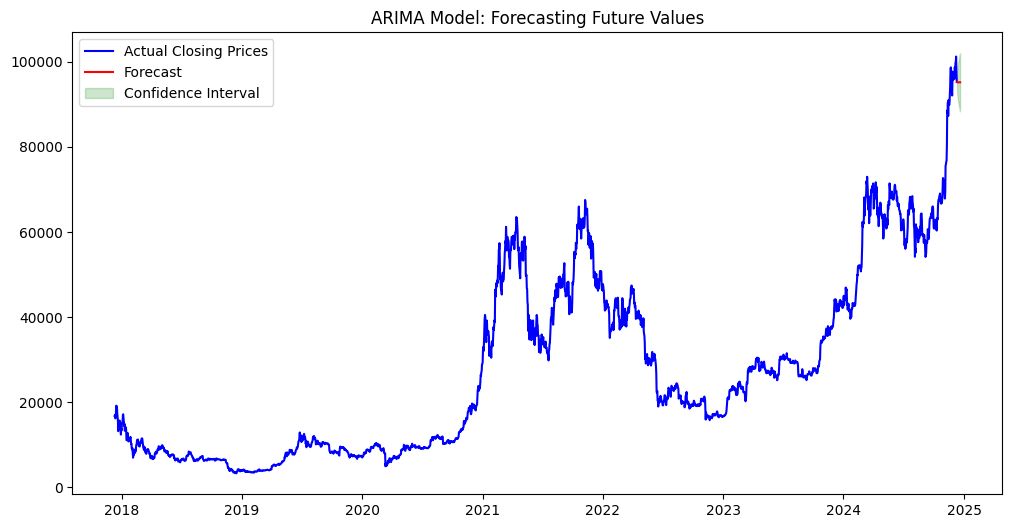

In [16]:
# Generate forecasts and confidence intervals
forecast_result = arima_result.get_forecast(steps=10)  # Forecast for the next 10 periods
forecast_values = forecast_result.predicted_mean
forecast_conf_int = forecast_result.conf_int()

# Ensure the forecast confidence intervals and index are properly aligned and numeric
forecast_conf_int.index = forecast_values.index  # Align the index
forecast_conf_int = forecast_conf_int.apply(pd.to_numeric)  # Convert to numeric

# Re-plot the forecast with corrected data
plt.figure(figsize=(12, 6))
plt.plot(closing_price, label='Actual Closing Prices', color='blue')
plt.plot(forecast_values, label='Forecast', color='red')
plt.fill_between(forecast_values.index,
                 forecast_conf_int.iloc[:, 0],
                 forecast_conf_int.iloc[:, 1],
                 color='green', alpha=0.2, label='Confidence Interval')
plt.legend(loc='upper left')
plt.title('ARIMA Model: Forecasting Future Values')
plt.show()


In [17]:
# Inspect the forecasted values and confidence intervals for potential issues
forecast_values.head(), forecast_conf_int.head()

(2024-12-11    95246.418060
 2024-12-12    95181.708852
 2024-12-13    95183.524260
 2024-12-14    95181.549619
 2024-12-15    95181.679617
 Freq: D, Name: predicted_mean, dtype: float64,
             lower Đóng cửa  upper Đóng cửa
 2024-12-11    93064.194520    97428.641600
 2024-12-12    92154.825958    98208.591747
 2024-12-13    91462.009767    98905.038752
 2024-12-14    90878.617114    99484.482124
 2024-12-15    90366.056331    99997.302903)

In [19]:
# ipython-input-10-b0151f8fad95
from sklearn.metrics import mean_absolute_error, mean_squared_error # Import necessary functions
import numpy as np                                                    # Import numpy for sqrt

# Correcting variable assignment for actual values
actual_values = closing_price[len(closing_price) - len(arima_result.fittedvalues):]

# Recalculate MAE and RMSE for ARIMA's fitted values
mae = mean_absolute_error(actual_values, arima_result.fittedvalues)
rmse = np.sqrt(mean_squared_error(actual_values, arima_result.fittedvalues))

mae, rmse

(649.2318835371577, 1161.2755388144735)

In [20]:
from pmdarima import auto_arima

# Assuming you want to use 80% of the data for training
train_data = closing_price[:int(len(closing_price) * 0.8)]

# Use auto_arima to find the best parameters for ARIMA
arima_model = auto_arima(
    train_data,
    seasonal=False,
    stepwise=True,
    trace=True,
    suppress_warnings=True,
    error_action="ignore"
)

# Display the summary of the best ARIMA model
print(arima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=33967.031, Time=1.67 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=33975.994, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=33975.151, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=33975.194, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=33974.085, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=33977.267, Time=0.40 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=33979.061, Time=0.27 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=33968.660, Time=1.93 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=33968.648, Time=2.59 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=33977.116, Time=0.15 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=33977.896, Time=0.50 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=33978.231, Time=0.61 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=33970.889, Time=2.24 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=33965.117, Time=0.77 sec
 ARIMA(1,1,2)(0,0,0

In [21]:
import pickle

# Save the ARIMA model to a file
arima_model_path = 'arima_model.pkl'
with open(arima_model_path, 'wb') as file:
    pickle.dump(arima_result, file)

arima_model_path


'arima_model.pkl'